## Keras -- MLPs on MNIST

In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [6]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [12]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [13]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

## 2-Hidden layer architecture (784-512-128-10 architecture)

 <h3>  MLP + Relu + ADAM </h3>

In [42]:
# Multilayer perceptron

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.2392 - acc: 0.9305 - val_loss: 0.1225 - val_acc: 0.9633
Epoch 2/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0864 - acc: 0.9734 - val_loss: 0.0899 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0546 - acc: 0.9832 - val_loss: 0.0740 - val_acc: 0.9777
Epoch 4/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0391 - acc: 0.9875 - val_loss: 0.0668 - val_acc: 0.9803
Epoch 5/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0287 - acc: 0.9910 - val_loss: 0.0772 - val_acc: 0.9790
Epoch 6/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0213 - acc: 0.9933 - val_loss: 0.0761 - val_acc: 0.9802
Epoch 7/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0730 

Test score: 0.10360029507032027
Test accuracy: 0.9808


<IPython.core.display.Javascript object>


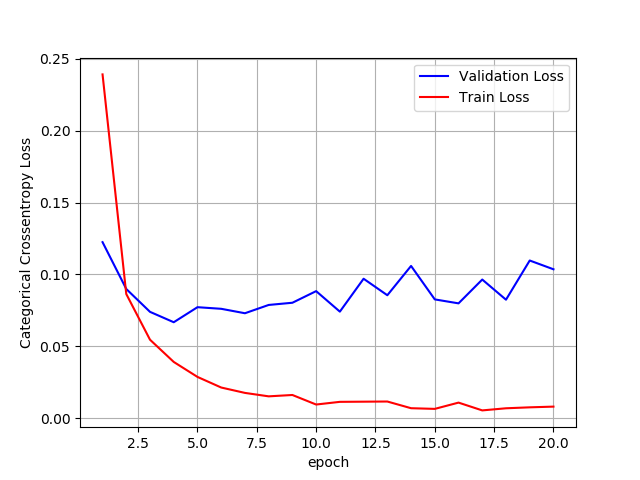

In [44]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


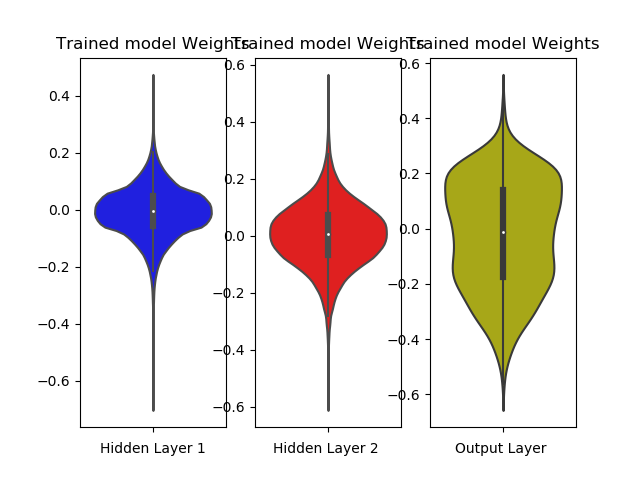

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [45]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + Adam </2>

In [49]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_21 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [50]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.1912 - acc: 0.9436 - val_loss: 0.1260 - val_acc: 0.9610
Epoch 2/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0726 - acc: 0.9786 - val_loss: 0.0836 - val_acc: 0.9734
Epoch 3/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0479 - acc: 0.9860 - val_loss: 0.0826 - val_acc: 0.9754
Epoch 4/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0316 - acc: 0.9906 - val_loss: 0.0768 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0255 - acc: 0.9920 - val_loss: 0.0727 - val_acc: 0.9769
Epoch 6/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0191 - acc: 0.9942 - val_loss: 0.0751 - val_acc: 0.9764
Epoch 7/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0162 - acc: 0.9950 - val_loss: 0.

Test score: 0.07941634960807478
Test accuracy: 0.9816


<IPython.core.display.Javascript object>


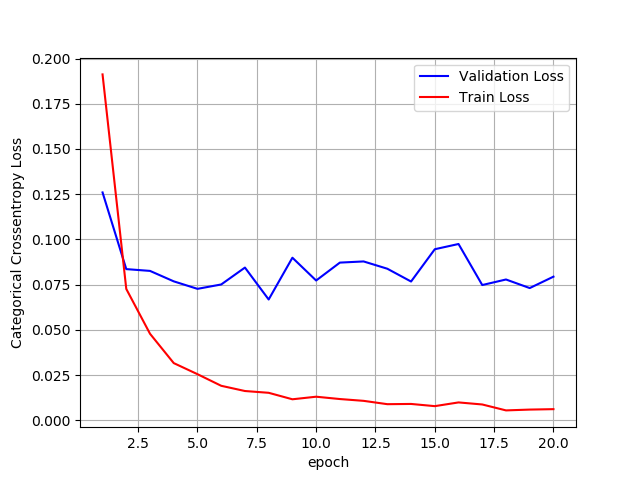

In [51]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


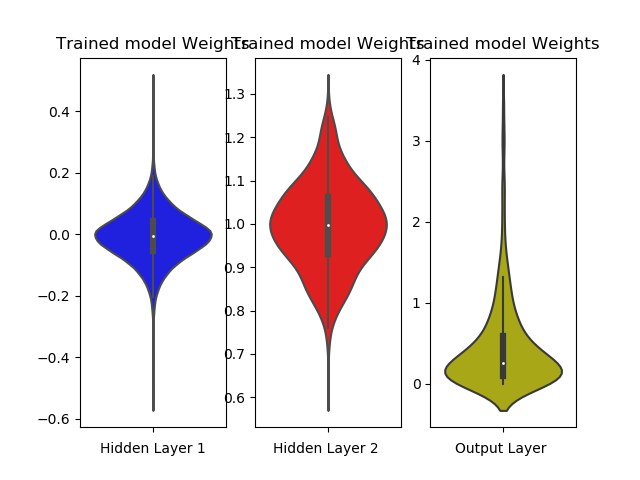

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [52]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Dropout + Adam </h2>

In [53]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

W0824 11:36:08.670158  2520 deprecation.py:506] From C:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)               

In [54]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.4950 - acc: 0.8494 - val_loss: 0.1664 - val_acc: 0.9486
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.2505 - acc: 0.9254 - val_loss: 0.1277 - val_acc: 0.9616
Epoch 3/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.2045 - acc: 0.9376 - val_loss: 0.1094 - val_acc: 0.9671
Epoch 4/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.1763 - acc: 0.9467 - val_loss: 0.0939 - val_acc: 0.9709
Epoch 5/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.1558 - acc: 0.9526 - val_loss: 0.0871 - val_acc: 0.9730
Epoch 6/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.1403 - acc: 0.9577 - val_loss: 0.0800 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.1317 - acc: 0.9601 - val_loss: 0.

Test score: 0.059719316212349806
Test accuracy: 0.9819


<IPython.core.display.Javascript object>


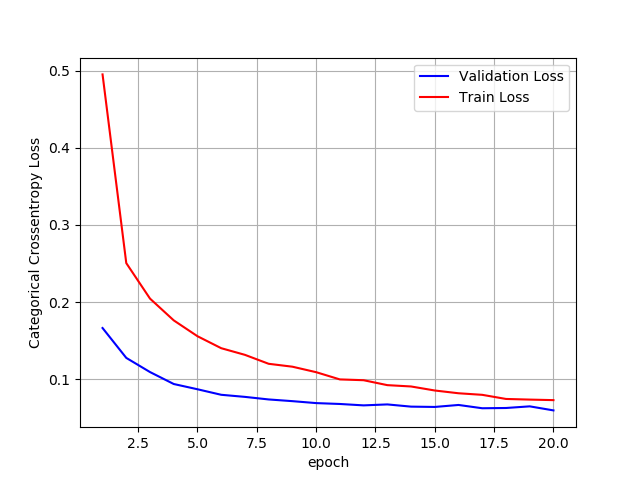

In [55]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


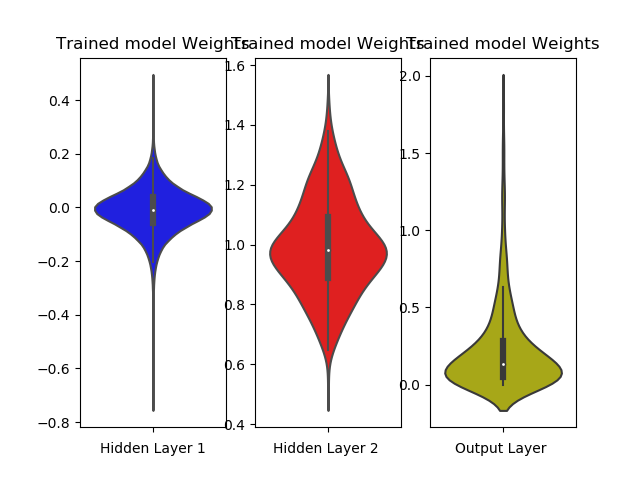

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [56]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Dropout + Adam </h2>

In [26]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop_wobatch = Sequential()

model_drop_wobatch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop_wobatch.add(Dropout(0.5))

model_drop_wobatch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop_wobatch.add(Dropout(0.5))

model_drop_wobatch.add(Dense(output_dim, activation='softmax'))


model_drop_wobatch.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_drop_wobatch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop_wobatch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0825 16:15:53.408957  8808 deprecation_wrapper.py:119] From C:\Anaconda\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 16:15:53.587855  8808 deprecation.py:323] From C:\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.9746 - acc: 0.6885 - val_loss: 0.3071 - val_acc: 0.9102
Epoch 2/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.4294 - acc: 0.8715 - val_loss: 0.2352 - val_acc: 0.9286
Epoch 3/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.3343 - acc: 0.9011 - val_loss: 0.1949 - val_acc: 0.9414
Epoch 4/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.2771 - acc: 0.9185 - val_loss: 0.1683 - val_acc: 0.9479
Epoch 5/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.2444 - acc: 0.9283 - val_loss: 0.1408 - val_acc: 0.9569
Epoch 6/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.2140 - acc: 0.9370 - val_loss: 0.1257 - val_acc: 0.9612
Epoch 7/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.1889 - acc: 0.9445 - val_loss: 0.11

Test score: 0.07177975425625918
Test accuracy: 0.9789


<IPython.core.display.Javascript object>


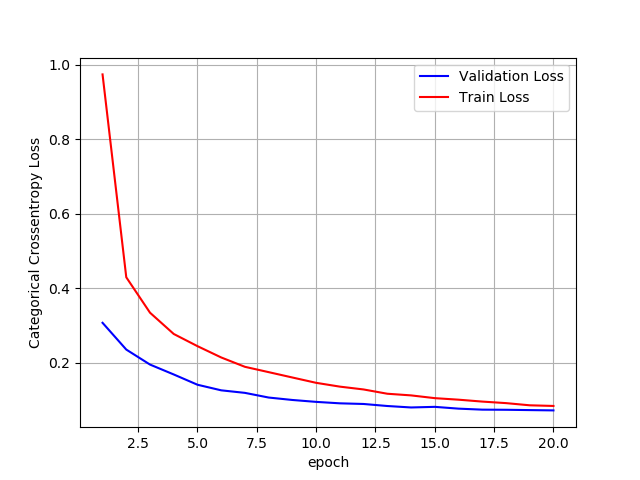

In [28]:
score = model_drop_wobatch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


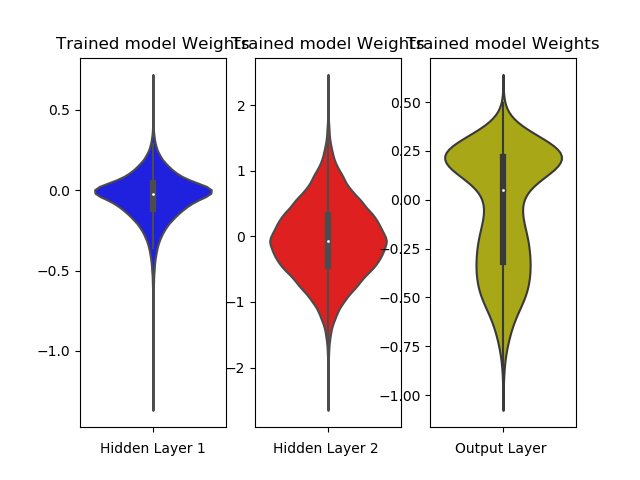

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [29]:
w_after = model_drop_wobatch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Dropout + Sgd </h2>

In [30]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop_wobatch1 = Sequential()

model_drop_wobatch1.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop_wobatch1.add(Dropout(0.3))

model_drop_wobatch1.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop_wobatch1.add(Dropout(0.3))

model_drop_wobatch1.add(Dense(output_dim, activation='softmax'))


model_drop_wobatch1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_drop_wobatch1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop_wobatch1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 132us/step - loss: 2.3434 - acc: 0.1475 - val_loss: 1.9877 - val_acc: 0.5366
Epoch 2/20
60000/60000 [==============================] - 7s 121us/step - loss: 2.0485 - acc: 0.2766 - val_loss: 1.5299 - val_acc: 0.6769
Epoch 3/20
60000/60000 [==============================] - 7s 118us/step - loss: 1.7324 - acc: 0.4200 - val_loss: 1.1314 - val_acc: 0.7322
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 1.4603 - acc: 0.5259 - val_loss: 0.9070 - val_acc: 0.7642
Epoch 5/20
60000/60000 [==============================] - 7s 119us/step - loss: 1.2562 - acc: 0.5965 - val_loss: 0.7689 - val_acc: 0.7882
Epoch 6/20
60000/60000 [==============================] - 7s 116us/step - loss: 1.1070 - acc: 0.6472 - val_loss: 0.6847 - val_acc: 0.8058
Epoch 7/20
60000/60000 [==============================] - 7s 116us/step - loss: 1.0025 - acc: 0.6788 - val_loss: 0.6249 - 

Test score: 0.3705834433913231
Test accuracy: 0.8926


<IPython.core.display.Javascript object>


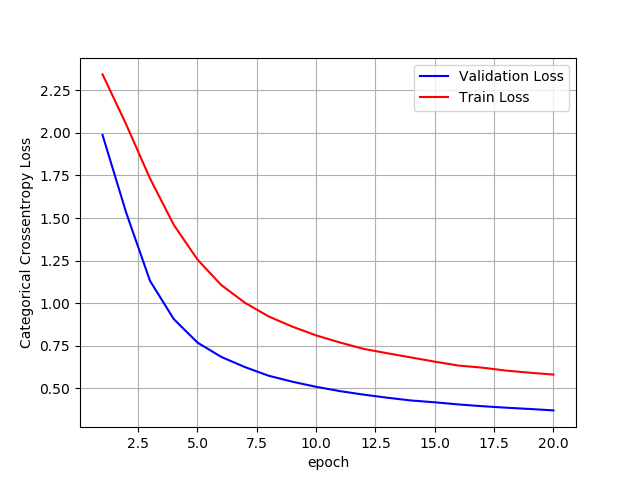

In [47]:
score = model_drop_wobatch1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


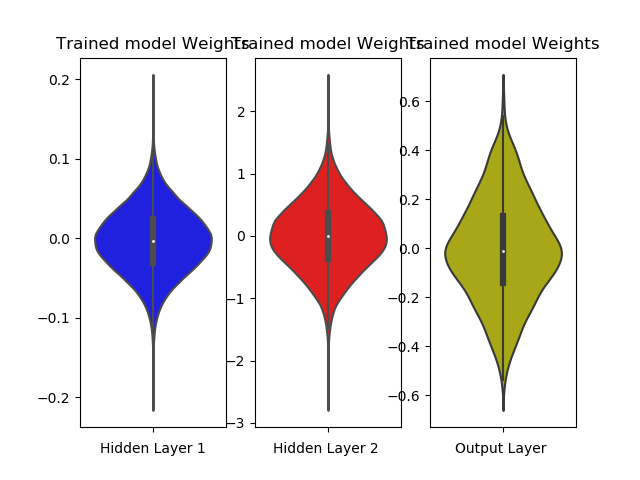

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [48]:
w_after = model_drop_wobatch1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3-Hidden layer architecture (784-400-160-80-10 architecture)

### MLP + RELU + ADAM

In [63]:
model_relu = Sequential()
model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(160, activation='relu'))
model_relu.add(Dense(80, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_30 (Dense)             (None, 160)               64160     
_________________________________________________________________
dense_31 (Dense)             (None, 80)                12880     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                810       
Total params: 391,850
Trainable params: 391,850
Non-trainable params: 0
_________________________________________________________________


In [64]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 1.1642 - acc: 0.7076 - val_loss: 0.5093 - val_acc: 0.8713
Epoch 2/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.4269 - acc: 0.8849 - val_loss: 0.3415 - val_acc: 0.9060
Epoch 3/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.3301 - acc: 0.9070 - val_loss: 0.2897 - val_acc: 0.9215
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.2875 - acc: 0.9182 - val_loss: 0.2599 - val_acc: 0.9272
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.2599 - acc: 0.9254 - val_loss: 0.2430 - val_acc: 0.9317
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.2392 - acc: 0.9314 - val_loss: 0.2259 - val_acc: 0.9325
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2222 - acc: 0.9355 - val_loss: 0.2126 - val_ac

Test score: 0.1252820463359356
Test accuracy: 0.9625


<IPython.core.display.Javascript object>


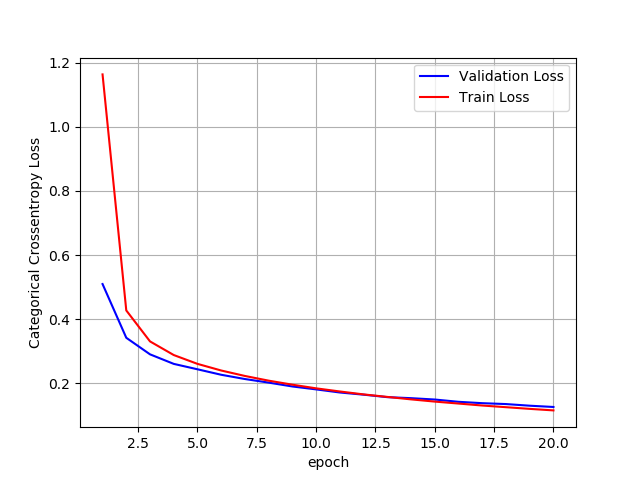

In [65]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


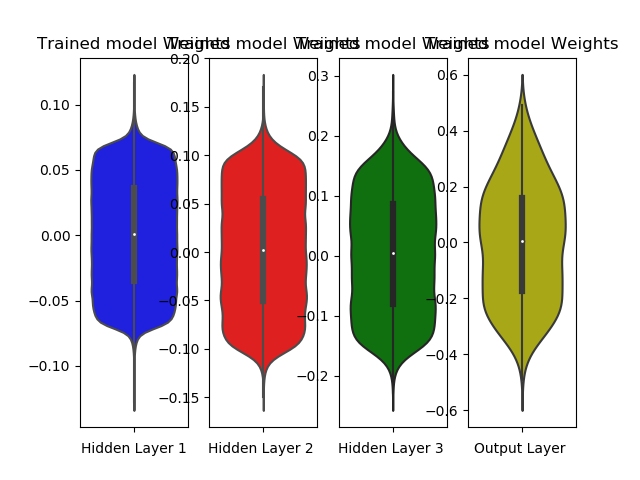

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [70]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + Adam </2>

In [71]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(160, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.47, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(80, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_5 (Batch (None, 400)               1600      
_________________________________________________________________
dense_34 (Dense)             (None, 160)               64160     
_________________________________________________________________
batch_normalization_6 (Batch (None, 160)               640       
_________________________________________________________________
dense_35 (Dense)             (None, 80)                12880     
_________________________________________________________________
batch_normalization_7 (Batch (None, 80)                320       
_________________________________________________________________
dense_36 (Dense)             (None, 10)              

In [72]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.2147 - acc: 0.9379 - val_loss: 0.1167 - val_acc: 0.9646
Epoch 2/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0822 - acc: 0.9753 - val_loss: 0.0963 - val_acc: 0.9701
Epoch 3/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0529 - acc: 0.9840 - val_loss: 0.1020 - val_acc: 0.9680
Epoch 4/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0393 - acc: 0.9879 - val_loss: 0.0816 - val_acc: 0.9723
Epoch 5/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0294 - acc: 0.9908 - val_loss: 0.0866 - val_acc: 0.9738
Epoch 6/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0245 - acc: 0.9918 - val_loss: 0.0819 - val_acc: 0.9756
Epoch 7/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0208 - acc: 0.9931 - val_loss: 0.0797 

Test score: 0.09756363881196849
Test accuracy: 0.9782


<IPython.core.display.Javascript object>


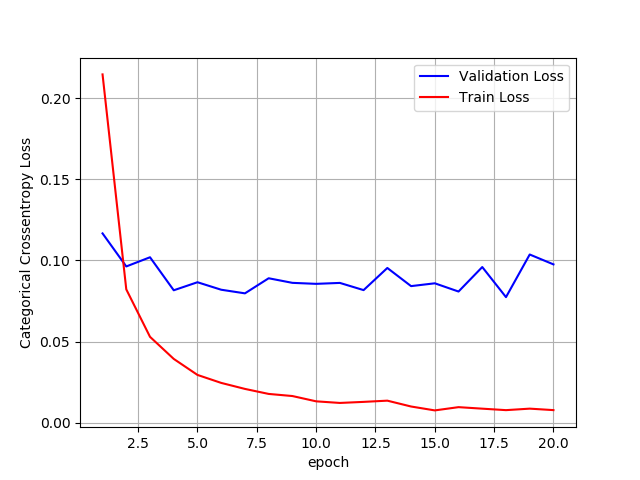

In [73]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


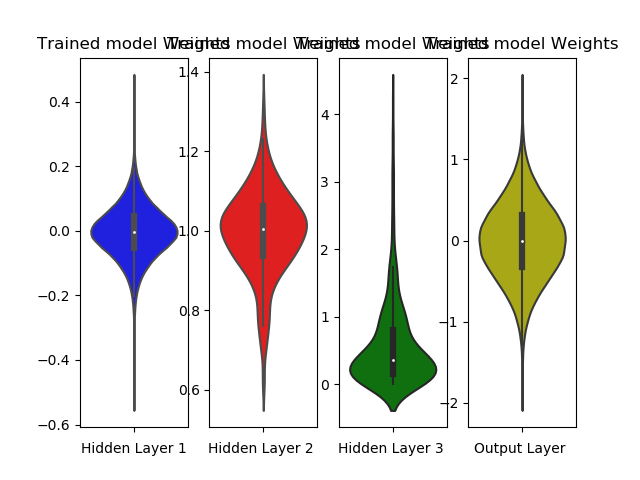

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [74]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Dropout + Adam </h2>

In [75]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(160, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.47, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(80, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_8 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 160)               64160     
_________________________________________________________________
batch_normalization_9 (Batch (None, 160)               640       
_________________________________________________________________
dropout_4 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 80)              

In [76]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.8850 - acc: 0.7251 - val_loss: 0.2283 - val_acc: 0.9315
Epoch 2/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.4054 - acc: 0.8817 - val_loss: 0.1702 - val_acc: 0.9467
Epoch 3/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.3135 - acc: 0.9089 - val_loss: 0.1476 - val_acc: 0.9539
Epoch 4/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.2613 - acc: 0.9258 - val_loss: 0.1269 - val_acc: 0.9622
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2324 - acc: 0.9343 - val_loss: 0.1116 - val_acc: 0.9664
Epoch 6/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2095 - acc: 0.9404 - val_loss: 0.1094 - val_acc: 0.9670
Epoch 7/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.1903 - acc: 0.9456 - val_loss: 0.

Test score: 0.07289138384530087
Test accuracy: 0.9802


<IPython.core.display.Javascript object>


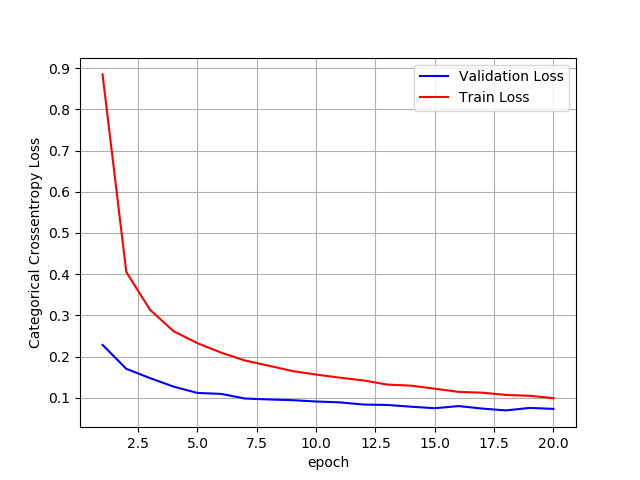

In [77]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


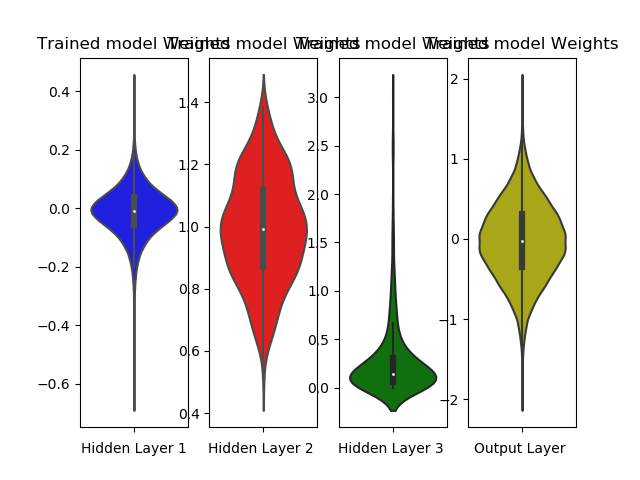

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [79]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Dropout + Sgd </h2>

In [35]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop_1 = Sequential()

model_drop_1.add(Dense(400, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop_1.add(Dropout(0.2))

model_drop_1.add(Dense(160, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.47, seed=None)) )
model_drop_1.add(Dropout(0.4))

model_drop_1.add(Dense(80, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop_1.add(Dropout(0.6))

model_drop_1.add(Dense(output_dim, activation='softmax'))


model_drop_1.summary()

W0825 16:36:31.252873  8808 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_10 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 160)               64160     
_________________________________________________________________
dropout_11 (Dropout)         (None, 160)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 80)                12880     
_________________________________________________________________
dropout_12 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [37]:
model_drop_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 126us/step - loss: 2.7022 - acc: 0.1075 - val_loss: 2.2148 - val_acc: 0.2388
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 2.4339 - acc: 0.1195 - val_loss: 2.1552 - val_acc: 0.4459
Epoch 3/20
60000/60000 [==============================] - 6s 108us/step - loss: 2.3237 - acc: 0.1374 - val_loss: 2.0998 - val_acc: 0.5357
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 2.2637 - acc: 0.1593 - val_loss: 2.0292 - val_acc: 0.5471
Epoch 5/20
60000/60000 [==============================] - 7s 115us/step - loss: 2.2117 - acc: 0.1865 - val_loss: 1.9322 - val_acc: 0.5662
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 2.1562 - acc: 0.2149 - val_loss: 1.8193 - val_acc: 0.5784
Epoch 7/20
60000/60000 [==============================] - 6s 105us/step - loss: 2.0894 - acc: 0.2474 - val_loss: 1.6944 - 

Test score: 0.827394066619873
Test accuracy: 0.7536


<IPython.core.display.Javascript object>


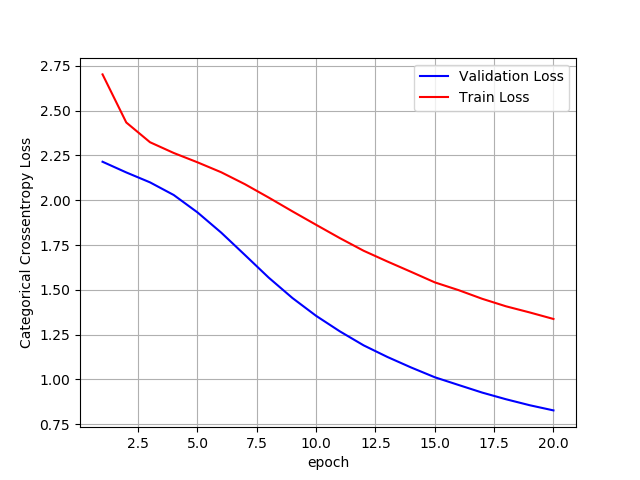

In [38]:
score = model_drop_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


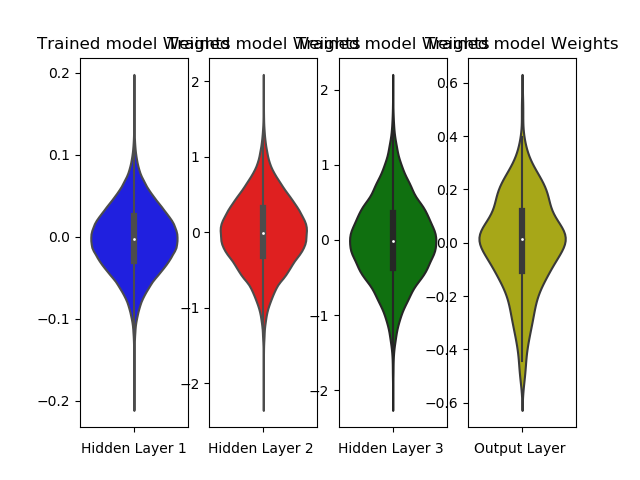

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [40]:
w_after = model_drop_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Dropout + Adam </h2>

In [41]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop_2 = Sequential()

model_drop_2.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.3, seed=None)))
model_drop_2.add(Dropout(0.6))

model_drop_2.add(Dense(160, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.4, seed=None)) )
model_drop_2.add(Dropout(0.6))

model_drop_2.add(Dense(80, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed=None)) )
model_drop_2.add(Dropout(0.6))

model_drop_2.add(Dense(output_dim, activation='softmax'))


model_drop_2.summary()

W0825 16:50:31.267312  8808 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0825 16:50:31.312285  8808 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0825 16:50:31.358258  8808 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_13 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 160)               64160     
_________________________________________________________________
dropout_14 (Dropout)         (None, 160)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 80)                12880     
_________________________________________________________________
dropout_15 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

In [45]:
model_drop_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 174us/step - loss: 14.1760 - acc: 0.1156 - val_loss: 11.8436 - val_acc: 0.2546
Epoch 2/20
60000/60000 [==============================] - 9s 150us/step - loss: 13.6999 - acc: 0.1456 - val_loss: 9.3012 - val_acc: 0.4139
Epoch 3/20
60000/60000 [==============================] - 9s 149us/step - loss: 12.7625 - acc: 0.2027 - val_loss: 9.0548 - val_acc: 0.4295
Epoch 4/20
60000/60000 [==============================] - 9s 145us/step - loss: 11.7312 - acc: 0.2664 - val_loss: 7.2505 - val_acc: 0.5428
Epoch 5/20
60000/60000 [==============================] - 9s 145us/step - loss: 10.7786 - acc: 0.3255 - val_loss: 6.9363 - val_acc: 0.5634
Epoch 6/20
60000/60000 [==============================] - 9s 153us/step - loss: 10.0508 - acc: 0.3713 - val_loss: 7.1287 - val_acc: 0.5545
Epoch 7/20
60000/60000 [==============================] - 9s 153us/step - loss: 9.3018 - acc: 0.4180 - val_loss: 6

Test score: 3.265939416706562
Test accuracy: 0.7936


<IPython.core.display.Javascript object>


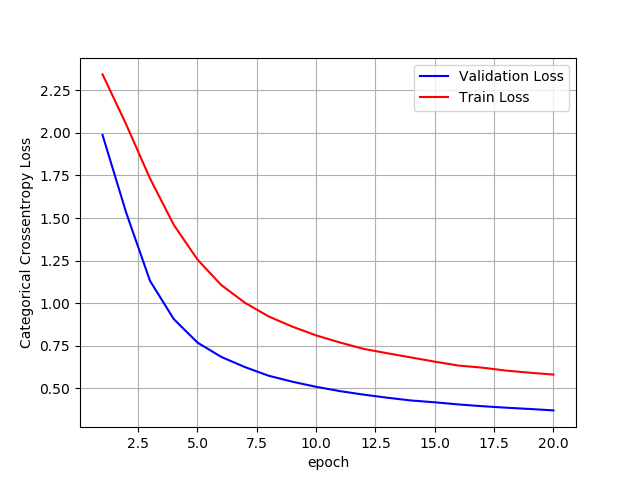

In [49]:
score = model_drop_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


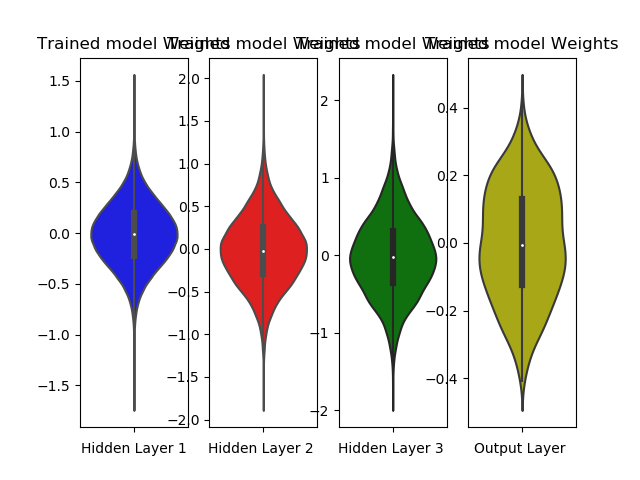

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [50]:
w_after = model_drop_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 5-Hidden layer architecture (784-250-160-100-80-50-10 architecture)

### MLP + RELU + ADAM

In [80]:
model_relu = Sequential()
model_relu.add(Dense(250, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(160, activation='relu'))
model_relu.add(Dense(100, activation='relu'))
model_relu.add(Dense(80, activation='relu'))
model_relu.add(Dense(50, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_42 (Dense)             (None, 160)               40160     
_________________________________________________________________
dense_43 (Dense)             (None, 100)               16100     
_________________________________________________________________
dense_44 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_45 (Dense)             (None, 50)                4050      
_________________________________________________________________
dense_46 (Dense)             (None, 10)                510       
Total params: 265,150
Trainable params: 265,150
Non-trainable params: 0
_______________________________________________

In [81]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 1.6445 - acc: 0.5475 - val_loss: 0.6864 - val_acc: 0.8173
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.4964 - acc: 0.8619 - val_loss: 0.3773 - val_acc: 0.8942
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3445 - acc: 0.9016 - val_loss: 0.3040 - val_acc: 0.9139
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2877 - acc: 0.9180 - val_loss: 0.2584 - val_acc: 0.9246
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2495 - acc: 0.9285 - val_loss: 0.2305 - val_acc: 0.9343
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2204 - acc: 0.9369 - val_loss: 0.2274 - val_acc: 0.9333
Epoch 7/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1981 - acc: 0.9434 - val_loss: 0.1893 - val_acc

Test score: 0.10844222966050729
Test accuracy: 0.9668


<IPython.core.display.Javascript object>


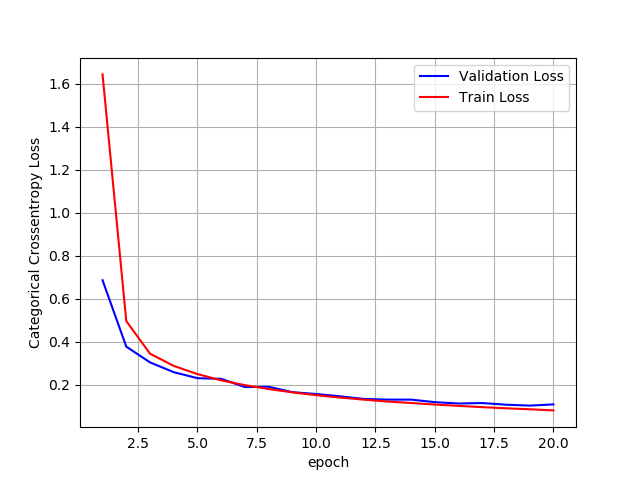

In [82]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


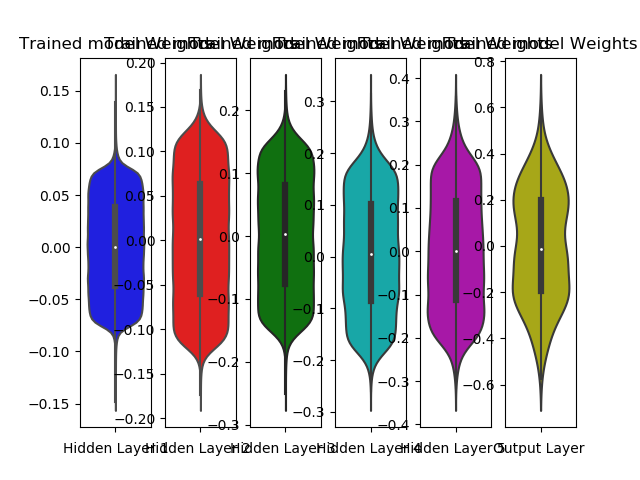

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [86]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='c')
plt.xlabel('Hidden Layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='m')
plt.xlabel('Hidden Layer 5 ')
plt.show()

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + Adam </2>

In [87]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(160, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.47, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())


model_batch.add(Dense(80, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.47, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 250)               196250    
_________________________________________________________________
batch_normalization_11 (Batc (None, 250)               1000      
_________________________________________________________________
dense_48 (Dense)             (None, 160)               40160     
_________________________________________________________________
batch_normalization_12 (Batc (None, 160)               640       
_________________________________________________________________
dense_49 (Dense)             (None, 100)               16100     
_________________________________________________________________
batch_normalization_13 (Batc (None, 100)               400       
_________________________________________________________________
dense_50 (Dense)             (None, 80)              

In [88]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.3474 - acc: 0.9012 - val_loss: 0.1476 - val_acc: 0.9542
Epoch 2/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.1177 - acc: 0.9653 - val_loss: 0.1106 - val_acc: 0.9653
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0817 - acc: 0.9750 - val_loss: 0.1023 - val_acc: 0.9687
Epoch 4/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0596 - acc: 0.9814 - val_loss: 0.0954 - val_acc: 0.9708
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0478 - acc: 0.9849 - val_loss: 0.1027 - val_acc: 0.9694
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0421 - acc: 0.9867 - val_loss: 0.0900 - val_acc: 0.9734
Epoch 7/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0333 - acc: 0.9893 - val_loss: 0.0907 -

Test score: 0.0925678516448028
Test accuracy: 0.9782


<IPython.core.display.Javascript object>


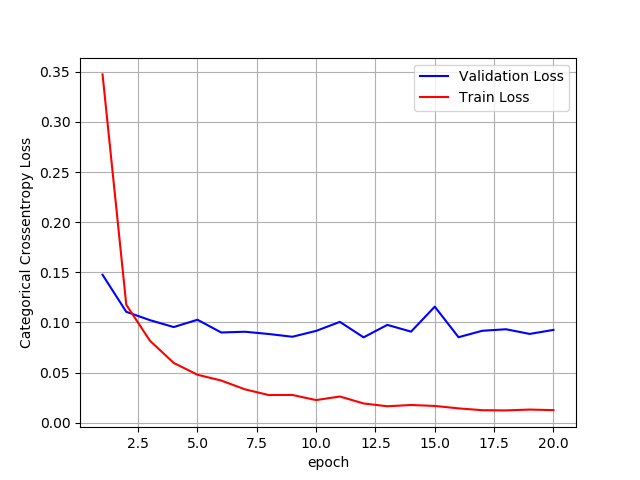

In [89]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


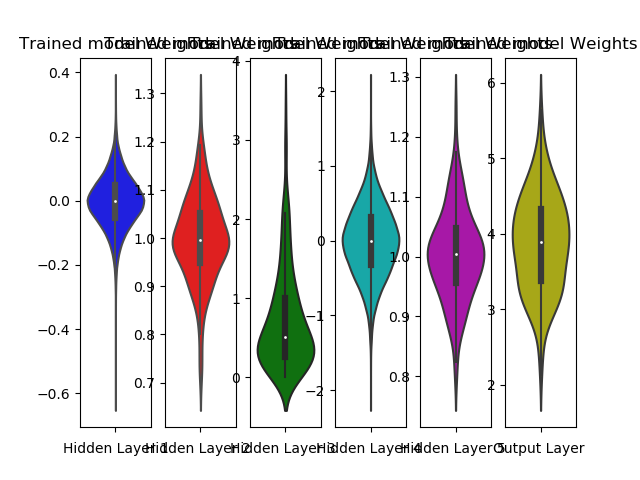

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [90]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='c')
plt.xlabel('Hidden Layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='m')
plt.xlabel('Hidden Layer 5 ')
plt.show()

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Dropout + Adam </h2>

In [92]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_drop.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(160, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.47, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(80, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.47, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 250)               196250    
_________________________________________________________________
batch_normalization_21 (Batc (None, 250)               1000      
_________________________________________________________________
dropout_11 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 160)               40160     
_________________________________________________________________
batch_normalization_22 (Batc (None, 160)               640       
_________________________________________________________________
dropout_12 (Dropout)         (None, 160)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 100)             

In [93]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 226us/step - loss: 2.0528 - acc: 0.3104 - val_loss: 0.8351 - val_acc: 0.7611
Epoch 2/20
60000/60000 [==============================] - 9s 157us/step - loss: 1.1057 - acc: 0.6060 - val_loss: 0.5097 - val_acc: 0.8411
Epoch 3/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.7928 - acc: 0.7285 - val_loss: 0.3665 - val_acc: 0.8987
Epoch 4/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.6433 - acc: 0.7958 - val_loss: 0.2815 - val_acc: 0.9250
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.5330 - acc: 0.8438 - val_loss: 0.2202 - val_acc: 0.9426
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.4601 - acc: 0.8715 - val_loss: 0.1964 - val_acc: 0.9477
Epoch 7/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.4074 - acc: 0.8898 - val_loss: 0.1731 -

Test score: 0.1154096132046543
Test accuracy: 0.9727


<IPython.core.display.Javascript object>


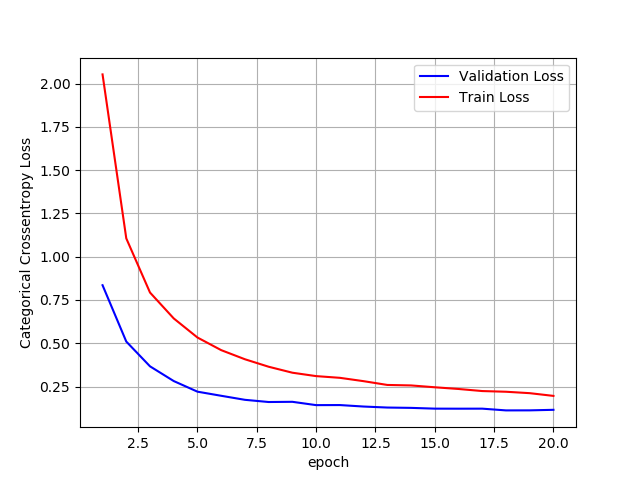

In [94]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


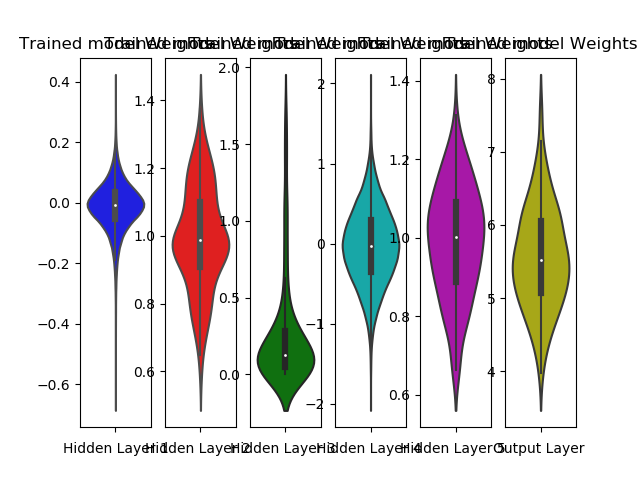

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [95]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='c')
plt.xlabel('Hidden Layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='m')
plt.xlabel('Hidden Layer 5 ')
plt.show()

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Relu + Adam </2>

In [52]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))

model_batch.add(Dense(160, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )

model_batch.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.3, seed=None)) )

model_batch.add(Dense(80, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.4, seed=None)) )

model_batch.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed=None)) )

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_23 (Dense)             (None, 160)               40160     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               16100     
_________________________________________________________________
dense_25 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_26 (Dense)             (None, 50)                4050      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                510       
Total params: 265,150
Trainable params: 265,150
Non-trainable params: 0
________________________________________________

In [53]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 1.8877 - acc: 0.8279 - val_loss: 0.5598 - val_acc: 0.9223
Epoch 2/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.3695 - acc: 0.9359 - val_loss: 0.3555 - val_acc: 0.9288
Epoch 3/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.2027 - acc: 0.9538 - val_loss: 0.2350 - val_acc: 0.9489
Epoch 4/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.1278 - acc: 0.9676 - val_loss: 0.2161 - val_acc: 0.9506
Epoch 5/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0957 - acc: 0.9744 - val_loss: 0.2058 - val_acc: 0.9550
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0774 - acc: 0.9785 - val_loss: 0.1982 - val_acc: 0.9534
Epoch 7/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0728 - acc: 0.9790 - val_loss: 0.2031 - val_ac

Test score: 0.1599981090700347
Test accuracy: 0.9705


<IPython.core.display.Javascript object>


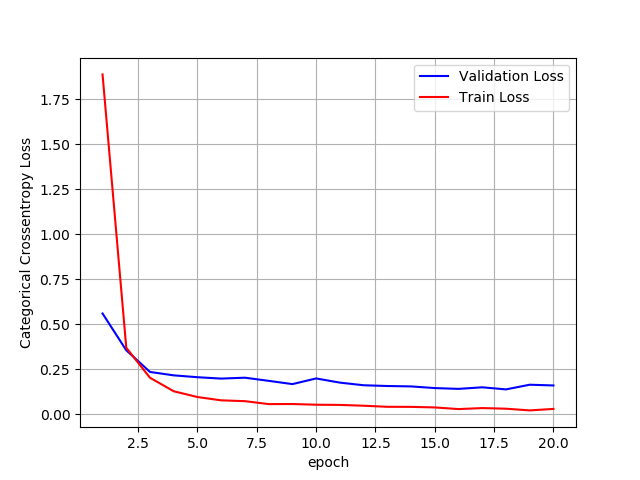

In [54]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


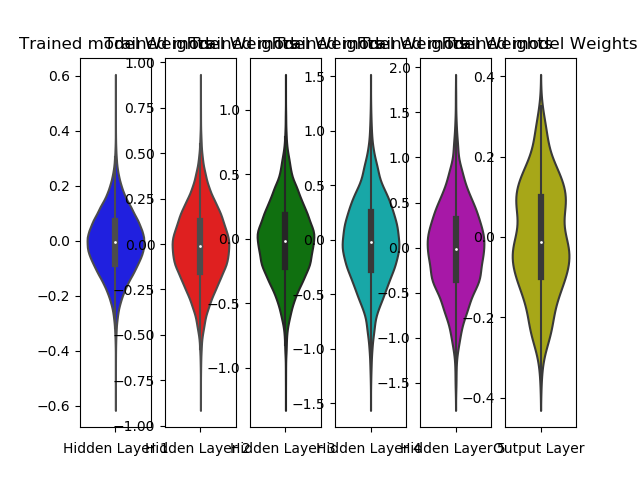

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [55]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='c')
plt.xlabel('Hidden Layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='m')
plt.xlabel('Hidden Layer 5 ')
plt.show()

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Dropout + Adam </h2>

In [14]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_drop.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_drop.add(Dropout(0.2))

model_drop.add(Dense(160, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.07, seed=None)) )
model_drop.add(Dropout(0.2))

model_drop.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.09, seed=None)) )
model_drop.add(Dropout(0.3))

model_drop.add(Dense(80, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.06, seed=None)) )
model_drop.add(Dropout(0.4))

model_drop.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

W0901 19:48:22.557980 13472 deprecation_wrapper.py:119] From C:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 19:48:22.585973 13472 deprecation_wrapper.py:119] From C:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 19:48:22.589971 13472 deprecation_wrapper.py:119] From C:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4409: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0901 19:48:22.609972 13472 deprecation_wrapper.py:119] From C:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0901 19:48:22.621984 13472 deprecation.py:506] From C:\Anaconda\lib\site-packages\keras\backend\ten

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 250)               196250    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 160)               40160     
_________________________________________________________________
dropout_2 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               16100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 80)               

In [16]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.3913 - acc: 0.9029 - val_loss: 0.1622 - val_acc: 0.9583
Epoch 2/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.2455 - acc: 0.9449 - val_loss: 0.1303 - val_acc: 0.9692
Epoch 3/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.1952 - acc: 0.9564 - val_loss: 0.1088 - val_acc: 0.9721
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1693 - acc: 0.9618 - val_loss: 0.1053 - val_acc: 0.9752
Epoch 5/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1406 - acc: 0.9691 - val_loss: 0.0981 - val_acc: 0.9752
Epoch 6/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1249 - acc: 0.9719 - val_loss: 0.1070 - val_acc: 0.9760
Epoch 7/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1158 - acc: 0.9739 - val_loss: 0.1203 - va

Test score: 0.10222209041239744
Test accuracy: 0.9824


<IPython.core.display.Javascript object>


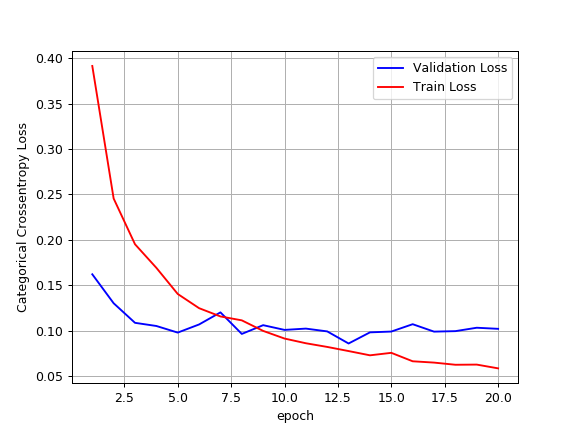

In [17]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


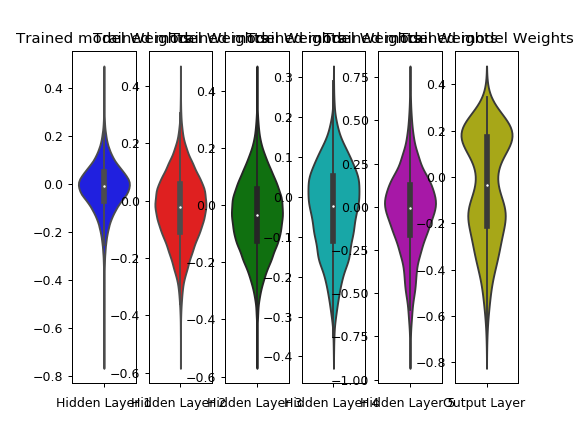

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [18]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='c')
plt.xlabel('Hidden Layer 4 ')
plt.show()

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='m')
plt.xlabel('Hidden Layer 5 ')
plt.show()

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Conclusuion

In [19]:
from prettytable import PrettyTable

x_pretty_table = PrettyTable()
x_pretty_table.field_names = ["Hiddel layers","Model name","Train-AUC","Test-AUC","Test Score"]

x_pretty_table.add_row(["2","Mlp+relu+adam",0.997,0.98,0.1])
x_pretty_table.add_row(["2","Mlp+Batch norm+relu+adam",0.998,0.981,0.07])
x_pretty_table.add_row(["2","Mlp+Batch norm+Drop out+relu+adam",0.976,0.981,0.06])
x_pretty_table.add_row(["2","Mlp+Drop out+sigmoid+adam",0.9744 ,0.9789,0.072])
x_pretty_table.add_row(["2","Mlp+Drop out+sigmoid+sgd",0.8200 ,0.8926,0.37])

x_pretty_table.add_row(["3","Mlp+relu+adam",0.9676,0.9625,0.125])
x_pretty_table.add_row(["3","Mlp+Batch norm+relu+adam",0.9974,0.9782,0.098])
x_pretty_table.add_row(["3","Mlp+Batch norm+Drop out+relu+adam",0.9714,0.98,0.07])
x_pretty_table.add_row(["3","Mlp+Drop out+sigmoid+sgd",0.5242 ,0.7536,0.82])
x_pretty_table.add_row(["3","Mlp+Drop out+relu+adam",0.6674 ,0.7936,3.266])

x_pretty_table.add_row(["5","Mlp+relu+adam",0.9775,0.9668,0.108])
x_pretty_table.add_row(["5","Mlp+Batch norm+relu+adam",0.9957,0.9782,0.093])
x_pretty_table.add_row(["5","Mlp+Batch norm+Drop out+relu+adam",0.9526,0.9727,0.115])
x_pretty_table.add_row(["5","Mlp+relu+adam",0.9912,0.9705,0.16])
x_pretty_table.add_row(["5","Mlp+Drop out+relu+adam",0.9861,0.9824,0.10])



print(x_pretty_table)

+---------------+-----------------------------------+-----------+----------+------------+
| Hiddel layers |             Model name            | Train-AUC | Test-AUC | Test Score |
+---------------+-----------------------------------+-----------+----------+------------+
|       2       |           Mlp+relu+adam           |   0.997   |   0.98   |    0.1     |
|       2       |      Mlp+Batch norm+relu+adam     |   0.998   |  0.981   |    0.07    |
|       2       | Mlp+Batch norm+Drop out+relu+adam |   0.976   |  0.981   |    0.06    |
|       2       |     Mlp+Drop out+sigmoid+adam     |   0.9744  |  0.9789  |   0.072    |
|       2       |      Mlp+Drop out+sigmoid+sgd     |    0.82   |  0.8926  |    0.37    |
|       3       |           Mlp+relu+adam           |   0.9676  |  0.9625  |   0.125    |
|       3       |      Mlp+Batch norm+relu+adam     |   0.9974  |  0.9782  |   0.098    |
|       3       | Mlp+Batch norm+Drop out+relu+adam |   0.9714  |   0.98   |    0.07    |
|       3 

### 1. Tried 3 different MLP architectures on MNIST dataset
###              ->2-Hidden layer architecture (784-512-128-10)
###              ->3-Hidden layer architecture (784-400-160-80-10)
###              ->5-Hidden layer architecture (784-250-160-100-80-50-10)

### 2.  All models are giving best results.

### 3. Models with dropout gives slightly better results compared to models without dropout.

### 4. Models with adam optimization gives slightly better results compared to models without adam optimization.

### 5. As the hidden layers are inreases,the performance decreases even with dropout and adam optimization.